### Question 1

In [1]:
library(ISLR)

In [2]:
library(caret)
library(tidyverse)

Loading required package: ggplot2

Loading required package: lattice

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
✔ purrr   0.3.4      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ purrr::lift()   masks caret::lift()


In [3]:
clg <- data.frame(College)

In [4]:
head(College)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


In [5]:
dim(College)

[1] 777  18

In [6]:
str(College)

'data.frame':	777 obs. of  18 variables:
 $ Private    : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Apps       : num  1660 2186 1428 417 193 ...
 $ Accept     : num  1232 1924 1097 349 146 ...
 $ Enroll     : num  721 512 336 137 55 158 103 489 227 172 ...
 $ Top10perc  : num  23 16 22 60 16 38 17 37 30 21 ...
 $ Top25perc  : num  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad: num  2885 2683 1036 510 249 ...
 $ P.Undergrad: num  537 1227 99 63 869 ...
 $ Outstate   : num  7440 12280 11250 12960 7560 ...
 $ Room.Board : num  3300 6450 3750 5450 4120 ...
 $ Books      : num  450 750 400 450 800 500 500 450 300 660 ...
 $ Personal   : num  2200 1500 1165 875 1500 ...
 $ PhD        : num  70 29 53 92 76 67 90 89 79 40 ...
 $ Terminal   : num  78 30 66 97 72 73 93 100 84 41 ...
 $ S.F.Ratio  : num  18.1 12.2 12.9 7.7 11.9 9.4 11.5 13.7 11.3 11.5 ...
 $ perc.alumni: num  12 16 30 37 2 11 26 37 23 15 ...
 $ Expend     : num  7041 10527 8735 19016 10922 ...
 $ Grad.Rate  : nu

In [7]:
ncol(College)

[1] 18

In [8]:
colnames(College)

[1] "Private"     "Apps"        "Accept"      "Enroll"      "Top10perc"  
 [6] "Top25perc"   "F.Undergrad" "P.Undergrad" "Outstate"    "Room.Board" 
[11] "Books"       "Personal"    "PhD"         "Terminal"    "S.F.Ratio"  
[16] "perc.alumni" "Expend"      "Grad.Rate"

## 1(a) 

In [9]:
set.seed(37)

In [10]:
random_split <- createDataPartition(College$Apps, p = 0.80, list = FALSE)

In [11]:
train_set <- College[random_split,]
test_set <- College[-random_split,]

In [12]:
z <- preProcess(train_set, method = c('center', 'scale'))

In [13]:
train_set <- predict(z, train_set)
test_set <- predict(z, test_set)

In [14]:
dim(train_set)
dim(test_set)

[1] 624  18

[1] 153  18

In [15]:
head(train_set)
head(test_set)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Abilene Christian University,Yes,-0.3656514,-0.3273735,-0.06249322,-0.2843630,-0.2275054,-0.1584481,-0.1921781,-0.7517024,-0.9753455,-0.5771233,1.2817396,-0.1641885,-0.1183149,0.9707108,-0.8810820,-0.50973047,-0.3377277
Adrian College,Yes,-0.4302706,-0.3851165,-0.47082030,-0.3406225,-0.3294174,-0.5366773,-0.4827674,0.1935551,-0.5650048,-0.8714393,-0.2383369,-1.2021574,-0.9371152,-0.2962384,0.5498482,-0.17457294,-0.6822652
Agnes Scott College,Yes,-0.7118655,-0.7050554,-0.68187768,1.7972392,1.6578661,-0.6442752,-0.5066514,0.6178045,0.9851715,-0.5771233,-0.6642521,1.1790653,1.1781189,-1.5631876,1.1063210,1.85952064,-0.3951507
Albertson College,Yes,-0.6645152,-0.6494511,-0.65960529,0.5595298,0.2820544,-0.6099093,-0.5212472,0.7517780,-0.9434301,-0.2828074,-0.9579867,-0.3473595,-0.4594817,-1.1489926,-0.9605781,0.02169404,-0.6248423
Albion College,Yes,-0.2990825,-0.1186432,-0.30855006,0.5032702,0.5877904,-0.4225335,-0.5272182,0.8430784,0.4161656,-0.5771233,-0.7009689,0.9958944,1.3828190,-0.1013231,1.1063210,0.36990965,0.4087702
Alfred University,Yes,-0.3455972,-0.2448224,-0.32658008,0.5032702,0.9444823,-0.3742576,-0.4754695,1.5079840,0.9450493,-0.2828074,-1.0681371,0.5684954,0.5640187,-0.6860689,0.6293443,0.26010302,0.4087702


,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Adelphi University,Yes,-0.2191441,-0.03138713,-0.2841565,-0.6781796,-1.3994931,-0.1997690,0.26559945,0.4490971008,1.89703988,1.1887722,0.2536685,-2.6675253,-3.3935161,-0.4667892,-0.563097533,0.1799739,-0.5674194
Alaska Pacific University,Yes,-0.7742564,-0.79188379,-0.7688460,-0.6781796,-0.6351533,-0.6976650,0.02808587,-0.7219305425,-0.22761346,1.4830881,0.2536685,0.2021534,-0.5277151,-0.5398825,-1.676043246,0.2581245,-2.9217590
Albertus Magnus College,Yes,-0.7296915,-0.70890497,-0.7179377,-0.6219201,-0.5841973,-0.6635037,-0.39585597,0.6996771685,1.23137596,-0.2828074,0.2536685,1.0569514,0.9051855,-0.6373401,0.231863690,-0.1496439,-0.1654590
Albright College,Yes,-0.5388977,-0.49546974,-0.5864246,0.1094536,0.3330104,-0.5495645,-0.34543409,1.2715455409,0.02770969,-1.4600711,-1.2150044,0.3853244,0.2910853,-0.6860689,-0.006624677,0.4009721,0.8107306
Alderson-Broaddus College,Yes,-0.6659079,-0.64132427,-0.6447570,-0.3968820,-0.6351533,-0.5851577,-0.49669972,-0.0004584267,-0.90239606,0.6590035,0.6942704,-1.9958983,-2.6429492,-0.6373401,-0.642593656,-0.1239234,-0.7971111
American International College,Yes,-0.4324989,-0.38682736,-0.5938487,-1.0719963,-1.7561850,-0.5403593,-0.35803956,-0.4390975947,0.37421968,-0.5771233,0.1068012,0.3242674,0.2910853,0.1423209,-0.324609166,-0.4476056,0.1790785


In [16]:
train_set.y <- train_set$Apps
test_set.y <- test_set$Apps
head(train_set.y,15)
head(test_set.y)

[1] -0.36565142 -0.43027062 -0.71186549 -0.66451521 -0.29908251 -0.34559719
 [7] -0.08934865 -0.49962485 -0.47511412 -0.69041860  0.37022755 -0.48931920
[13]  0.15798690  1.20888446  2.73969098

[1] -0.2191441 -0.7742564 -0.7296915 -0.5388977 -0.6659079 -0.4324989

In [17]:
ony_encoding <- dummyVars(Apps ~ ., data = train_set)
ony_encoding
train_set.x <- predict(ony_encoding, train_set)
test_set.x <- predict(ony_encoding, test_set)

Dummy Variable Object

Formula: Apps ~ .
18 variables, 1 factors
Variables and levels will be separated by '.'
A less than full rank encoding is used

In [18]:
head(train_set.x)
head(test_set.x)

,Private.No,Private.Yes,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,0,1,-0.3273735,-0.06249322,-0.2843630,-0.2275054,-0.1584481,-0.1921781,-0.7517024,-0.9753455,-0.5771233,1.2817396,-0.1641885,-0.1183149,0.9707108,-0.8810820,-0.50973047,-0.3377277
Adrian College,0,1,-0.3851165,-0.47082030,-0.3406225,-0.3294174,-0.5366773,-0.4827674,0.1935551,-0.5650048,-0.8714393,-0.2383369,-1.2021574,-0.9371152,-0.2962384,0.5498482,-0.17457294,-0.6822652
Agnes Scott College,0,1,-0.7050554,-0.68187768,1.7972392,1.6578661,-0.6442752,-0.5066514,0.6178045,0.9851715,-0.5771233,-0.6642521,1.1790653,1.1781189,-1.5631876,1.1063210,1.85952064,-0.3951507
Albertson College,0,1,-0.6494511,-0.65960529,0.5595298,0.2820544,-0.6099093,-0.5212472,0.7517780,-0.9434301,-0.2828074,-0.9579867,-0.3473595,-0.4594817,-1.1489926,-0.9605781,0.02169404,-0.6248423
Albion College,0,1,-0.1186432,-0.30855006,0.5032702,0.5877904,-0.4225335,-0.5272182,0.8430784,0.4161656,-0.5771233,-0.7009689,0.9958944,1.3828190,-0.1013231,1.1063210,0.36990965,0.4087702
Alfred University,0,1,-0.2448224,-0.32658008,0.5032702,0.9444823,-0.3742576,-0.4754695,1.5079840,0.9450493,-0.2828074,-1.0681371,0.5684954,0.5640187,-0.6860689,0.6293443,0.26010302,0.4087702


,Private.No,Private.Yes,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Adelphi University,0,1,-0.03138713,-0.2841565,-0.6781796,-1.3994931,-0.1997690,0.26559945,0.4490971008,1.89703988,1.1887722,0.2536685,-2.6675253,-3.3935161,-0.4667892,-0.563097533,0.1799739,-0.5674194
Alaska Pacific University,0,1,-0.79188379,-0.7688460,-0.6781796,-0.6351533,-0.6976650,0.02808587,-0.7219305425,-0.22761346,1.4830881,0.2536685,0.2021534,-0.5277151,-0.5398825,-1.676043246,0.2581245,-2.9217590
Albertus Magnus College,0,1,-0.70890497,-0.7179377,-0.6219201,-0.5841973,-0.6635037,-0.39585597,0.6996771685,1.23137596,-0.2828074,0.2536685,1.0569514,0.9051855,-0.6373401,0.231863690,-0.1496439,-0.1654590
Albright College,0,1,-0.49546974,-0.5864246,0.1094536,0.3330104,-0.5495645,-0.34543409,1.2715455409,0.02770969,-1.4600711,-1.2150044,0.3853244,0.2910853,-0.6860689,-0.006624677,0.4009721,0.8107306
Alderson-Broaddus College,0,1,-0.64132427,-0.6447570,-0.3968820,-0.6351533,-0.5851577,-0.49669972,-0.0004584267,-0.90239606,0.6590035,0.6942704,-1.9958983,-2.6429492,-0.6373401,-0.642593656,-0.1239234,-0.7971111
American International College,0,1,-0.38682736,-0.5938487,-1.0719963,-1.7561850,-0.5403593,-0.35803956,-0.4390975947,0.37421968,-0.5771233,0.1068012,0.3242674,0.2910853,0.1423209,-0.324609166,-0.4476056,0.1790785


In [19]:
a <- lm(Apps ~ ., data = train_set)
b <- predict(a, test_set)
(linear_i <- postResample(b, test_set$Apps))

lin_MSE <- mean((b - test_set$Apps)^2); lin_MSE

RMSE  Rsquared       MAE 
0.3645475 0.9454759 0.1647033

[1] 0.1328949

## (b) 

In [20]:
install.packages("glmnet")


The downloaded binary packages are in
	/var/folders/p2/3vyybrys3f5cgcrs2zkj3hdw0000gn/T//Rtmpm6K6WD/downloaded_packages


In [21]:
ridge_fit <- train(x = train_set.x, y = train_set.y,
                   method = 'glmnet', 
                   trControl = trainControl(method = 'cv', number = 10),
                   tuneGrid = expand.grid(alpha = 0,
                                          lambda = seq(0, 10e2, length.out = 20)))

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


In [22]:
(ridge_info <- postResample(predict(ridge_fit, test_set.x), test_set.y))

RMSE  Rsquared       MAE 
0.5281938 0.8880963 0.1985998

In [23]:
coef(ridge_fit$finalModel, ridge_fit$bestTune$lambda)

19 x 1 sparse Matrix of class "dgCMatrix"
                      s1
(Intercept)  0.047287585
Private.No   0.100217000
Private.Yes -0.101189699
Accept       0.509377616
Enroll       0.161105772
Top10perc    0.131469933
Top25perc    0.006317287
F.Undergrad  0.141952374
P.Undergrad  0.011767879
Outstate     0.005151944
Room.Board   0.058989055
Books        0.006388053
Personal    -0.007106430
PhD         -0.015872793
Terminal    -0.020029030
S.F.Ratio    0.015673931
perc.alumni -0.048138534
Expend       0.117828719
Grad.Rate    0.058108322

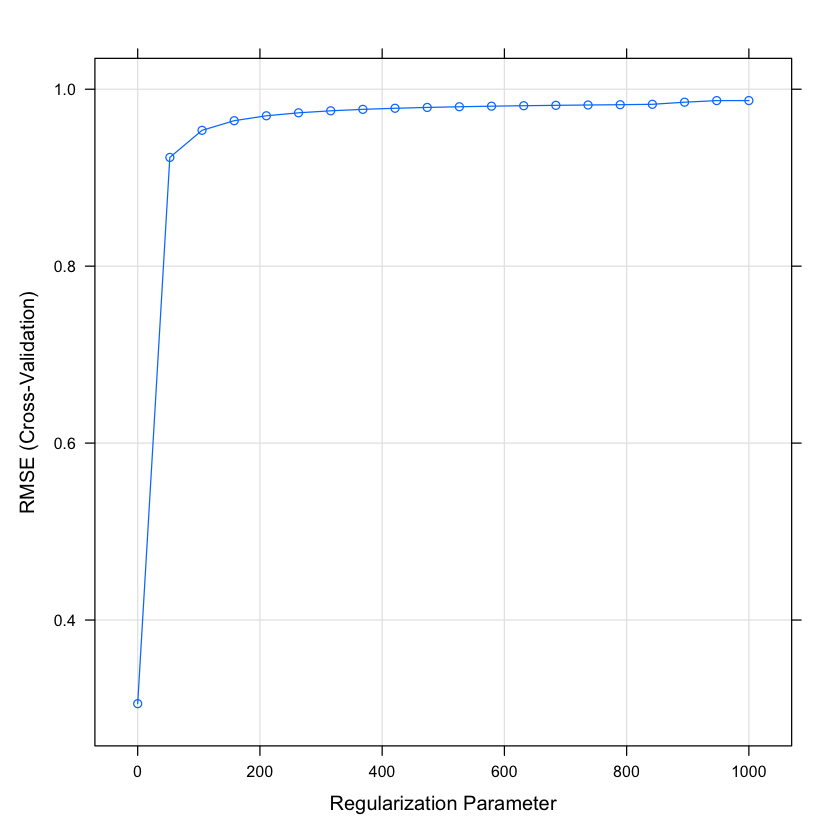

In [24]:
plot(ridge_fit)


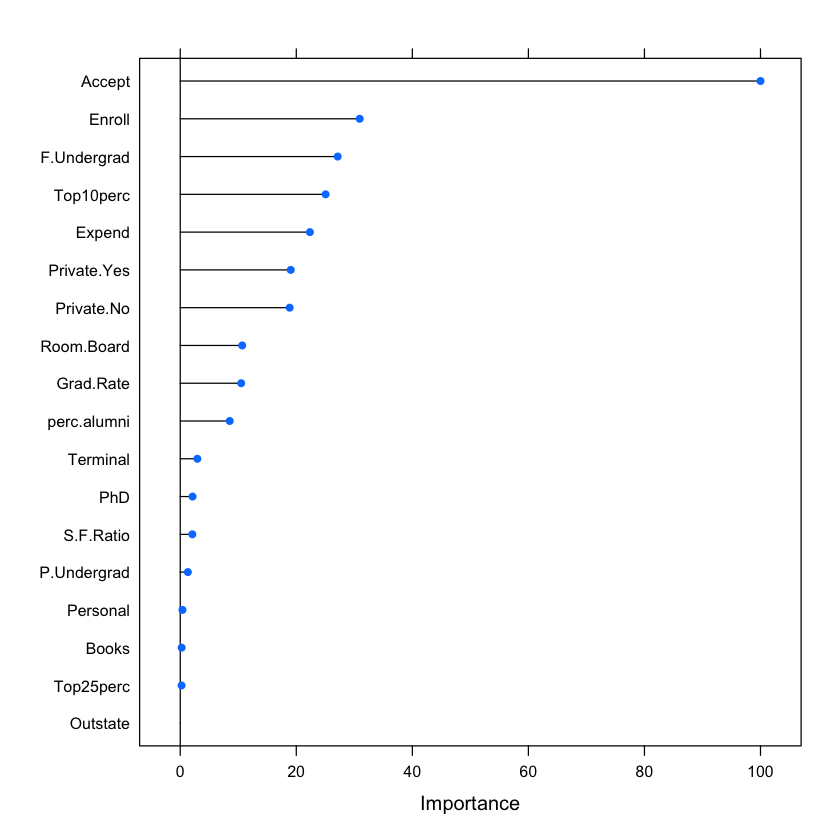

In [25]:
plot(varImp(ridge_fit))

### Q1(d) Fit a lasso model on the training set, with lam chosen by cross-validation. Report the test error obtained, along with the number of non-zero coefficient estimates. 

In [26]:
lasso_fit <- train(x = train_set.x, y = train_set.y, 
                   method = 'glmnet',
                   trControl = trainControl(method = 'cv', number = 10),
                   tuneGrid = expand.grid(alpha = 1,
                                          lambda = seq(0.0001, 1, length.out = 50)))

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


In [27]:
(lasso_info <- postResample(predict(lasso_fit, test_set.x), test_set.y))

RMSE  Rsquared       MAE 
0.3680450 0.9449183 0.1641810

In [28]:
coef(lasso_fit$finalModel, lasso_fit$bestTune$lambda)

19 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -4.602356e-02
Private.No   1.719683e-01
Private.Yes -3.736929e-14
Accept       8.156559e-01
Enroll      -7.992584e-02
Top10perc    2.324004e-01
Top25perc   -7.148602e-02
F.Undergrad  1.180751e-01
P.Undergrad  1.216737e-02
Outstate    -4.823323e-02
Room.Board   4.868812e-02
Books        1.557381e-03
Personal     .           
PhD         -3.820240e-02
Terminal    -1.370517e-02
S.F.Ratio    1.949270e-02
perc.alumni -2.275036e-02
Expend       1.175063e-01
Grad.Rate    5.240594e-02

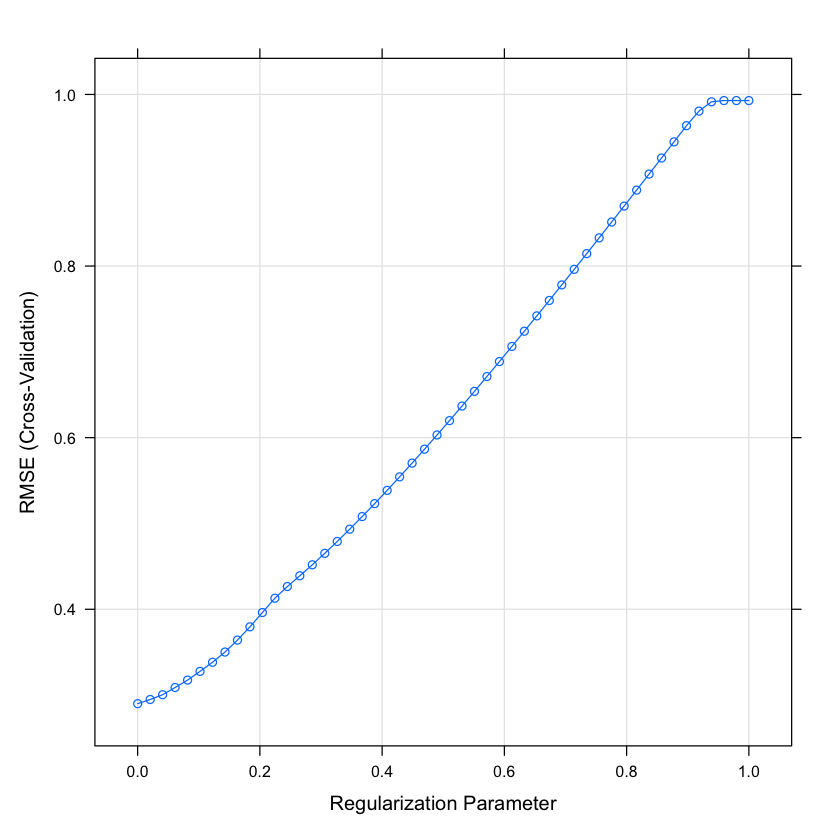

In [29]:
plot(lasso_fit)

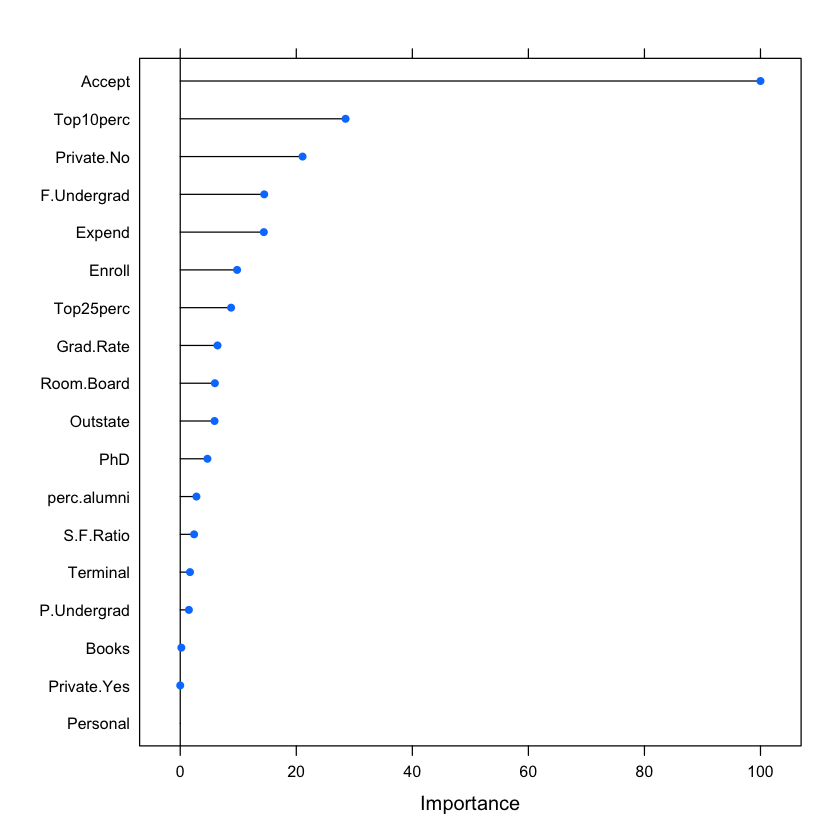

In [30]:
plot(varImp(lasso_fit))

## 1(g)

In [31]:
as_tibble(rbind(linear_i,
      ridge_info,
      lasso_info)) %>%
    mutate(model = c('Linear', 'Ridge', 'Lasso')) %>%
    select(model, RMSE, Rsquared)

model,RMSE,Rsquared
<chr>,<dbl>,<dbl>
Linear,0.3645475,0.9454759
Ridge,0.5281938,0.8880963
Lasso,0.3680450,0.9449183


In [32]:
test_set %>%
    summarize(sd = sd(Apps))

sd
<dbl>
1.353661


The ridge regression model performed slightly better than the other two models. The RMSE > 21 and Rsqaured > 94 for linear and lasso regression models, but if observed the RMSE value of Ridge regression model is slightly lesser than the other two models and Rsquared is slightly higher than linear and lasso models. When we compare the RMSE scores with the mean and standard deviation of the response variable we see that the models all have phenomenal accuracy!

# Question 2 

In [33]:
rm(list = ls())
install.packages('stargazer')


The downloaded binary packages are in
	/var/folders/p2/3vyybrys3f5cgcrs2zkj3hdw0000gn/T//Rtmpm6K6WD/downloaded_packages


In [34]:
install.packages('leaps')
library(leaps)
library(glmnet)
library(caret)


The downloaded binary packages are in
	/var/folders/p2/3vyybrys3f5cgcrs2zkj3hdw0000gn/T//Rtmpm6K6WD/downloaded_packages


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-4



In [35]:
library(leaps)
library(glmnet)
library(caret)

In [36]:
setwd("~/Desktop/R Assignment - JupR -2")

In [37]:
train_set  <- data.frame(read.table('ticdata2000.txt')) #Training data 
x_test_set <- data.frame(read.table('ticeval2000.txt')) #Testing data
y_test_set <- data.frame(read.table('tictgts2000.txt')) #For Evalutaion
str(train_set)

'data.frame':	5822 obs. of  86 variables:
 $ V1 : int  33 37 37 9 40 23 39 33 33 11 ...
 $ V2 : int  1 1 1 1 1 1 2 1 1 2 ...
 $ V3 : int  3 2 2 3 4 2 3 2 2 3 ...
 $ V4 : int  2 2 2 3 2 1 2 3 4 3 ...
 $ V5 : int  8 8 8 3 10 5 9 8 8 3 ...
 $ V6 : int  0 1 0 2 1 0 2 0 0 3 ...
 $ V7 : int  5 4 4 3 4 5 2 7 1 5 ...
 $ V8 : int  1 1 2 2 1 0 0 0 3 0 ...
 $ V9 : int  3 4 4 4 4 5 5 2 6 2 ...
 $ V10: int  7 6 3 5 7 0 7 7 6 7 ...
 $ V11: int  0 2 2 2 1 6 2 2 0 0 ...
 $ V12: int  2 2 4 2 2 3 0 0 3 2 ...
 $ V13: int  1 0 4 2 2 3 0 0 3 2 ...
 $ V14: int  2 4 4 3 4 5 3 5 3 2 ...
 $ V15: int  6 5 2 4 4 2 6 4 3 6 ...
 $ V16: int  1 0 0 3 5 0 0 0 0 0 ...
 $ V17: int  2 5 5 4 4 5 4 3 1 4 ...
 $ V18: int  7 4 4 2 0 4 5 6 8 5 ...
 $ V19: int  1 0 0 4 0 2 0 2 1 2 ...
 $ V20: int  0 0 0 0 5 0 0 0 1 0 ...
 $ V21: int  1 0 0 0 4 0 0 0 0 0 ...
 $ V22: int  2 5 7 3 0 4 4 2 1 3 ...
 $ V23: int  5 0 0 1 0 2 1 5 8 3 ...
 $ V24: int  2 4 2 2 0 2 5 2 1 3 ...
 $ V25: int  1 0 0 3 9 2 0 2 1 1 ...
 $ V26: int  1 2 5 2 0 

In [38]:
x_train_set = train_set[, -86] #without response
y_train_set = train_set[, "V86"] #only response

In [39]:
dim(train_set)
dim(x_test_set)
dim(x_train_set)

[1] 5822   86

[1] 4000   85

[1] 5822   85

In [40]:
# checking if there are missing values (NAs)
colSums(is.na(train_set))
colSums(is.na(x_test_set))

V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V21 V22 V23 V24 V25 V26 V27 V28 V29 V30 V31 V32 V33 V34 V35 V36 V37 V38 V39 V40 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V41 V42 V43 V44 V45 V46 V47 V48 V49 V50 V51 V52 V53 V54 V55 V56 V57 V58 V59 V60 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V61 V62 V63 V64 V65 V66 V67 V68 V69 V70 V71 V72 V73 V74 V75 V76 V77 V78 V79 V80 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V81 V82 V83 V84 V85 V86 
  0   0   0   0   0   0

V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V21 V22 V23 V24 V25 V26 V27 V28 V29 V30 V31 V32 V33 V34 V35 V36 V37 V38 V39 V40 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V41 V42 V43 V44 V45 V46 V47 V48 V49 V50 V51 V52 V53 V54 V55 V56 V57 V58 V59 V60 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V61 V62 V63 V64 V65 V66 V67 V68 V69 V70 V71 V72 V73 V74 V75 V76 V77 V78 V79 V80 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
V81 V82 V83 V84 V85 
  0   0   0   0   0

From the description of the dataset it is given that, attribute 86, "CARAVAN:Number of mobile home policies", is the target variable. i.e V86 is the target variable

In [41]:
table(train_set$V86) #number of 0s and 1s


   0    1 
5474  348 

In [42]:
linear_model <- lm(V86 ~ ., data = train_set)
summary(linear_model)


Call:
lm(formula = V86 ~ ., data = train_set)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67293 -0.08720 -0.04593 -0.00639  1.04628 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.7685381  0.4298406   1.788 0.073835 .  
V1           0.0035209  0.0022512   1.564 0.117866    
V2          -0.0072642  0.0076739  -0.947 0.343875    
V3          -0.0012739  0.0071737  -0.178 0.859055    
V4           0.0107473  0.0049596   2.167 0.030279 *  
V5          -0.0154869  0.0101044  -1.533 0.125405    
V6          -0.0056016  0.0056016  -1.000 0.317353    
V7          -0.0002069  0.0060664  -0.034 0.972795    
V8           0.0003569  0.0054592   0.065 0.947874    
V9          -0.0030237  0.0058038  -0.521 0.602399    
V10          0.0086829  0.0075479   1.150 0.250036    
V11          0.0020367  0.0072008   0.283 0.777310    
V12          0.0055682  0.0076295   0.730 0.465526    
V13         -0.0038250  0.0065474  -0.584 0.559107    
V14      

__predicting train and test__

In [43]:
linear_train = predict(linear_model, x_train_set)
linear_test = predict(linear_model, x_test_set)
head(linear_train)
head(linear_test)

1          2          3          4          5          6 
0.09738541 0.01345938 0.08354523 0.09075754 0.04307400 0.01475749

1           2           3           4           5           6 
0.014441132 0.215946829 0.099937482 0.095439888 0.005945841 0.027520016

In [44]:
linear_train= ifelse(linear_train > 0.5, 1, 0)      #modifying values above (0.5 - 1) and below or equal to (0.5 - 0)
linear_test = ifelse(linear_test > 0.5, 1, 0)

__errors__

In [45]:
train_error <- postResample(linear_train, train_set[, 86])
test_error  <- postResample(linear_test, y_test_set[, 1])


In [46]:
train_error
test_error

RMSE    Rsquared         MAE 
0.244134208 0.003378766 0.059601512

RMSE    Rsquared         MAE 
0.244438131 0.001005736 0.059750000

In [47]:
names(y_test_set) <- "V86"
test_set <- cbind(x_test_set, y_test_set)
head(test_set)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,33,1,4,2,8,0,6,0,3,5,⋯,0,0,0,1,0,0,0,0,0,0
2,6,1,3,2,2,0,5,0,4,5,⋯,0,0,0,1,0,0,0,0,0,1
3,39,1,3,3,9,1,4,2,3,5,⋯,0,0,0,1,0,0,0,0,0,0
4,9,1,2,3,3,2,3,2,4,5,⋯,0,0,0,1,0,0,0,0,0,0
5,31,1,2,4,7,0,2,0,7,9,⋯,0,0,0,1,0,0,0,0,0,0
6,30,1,2,4,7,1,4,2,3,5,⋯,0,0,0,2,0,0,0,0,0,0


### Forward Selection

In [48]:
regfit_fwd  <- regsubsets(V86~., nbest = 1, data = train_set, method = "forward",  nvmax = 85)
regfit_bwd <- regsubsets(V86~., nbest = 1, data = train_set, method = "backward", nvmax = 85)

In [49]:
forward_summary <- summary(regfit_fwd)
backward_summary<- summary(regfit_bwd)

In [50]:
names(forward_summary)
names(backward_summary)

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

__model selection__

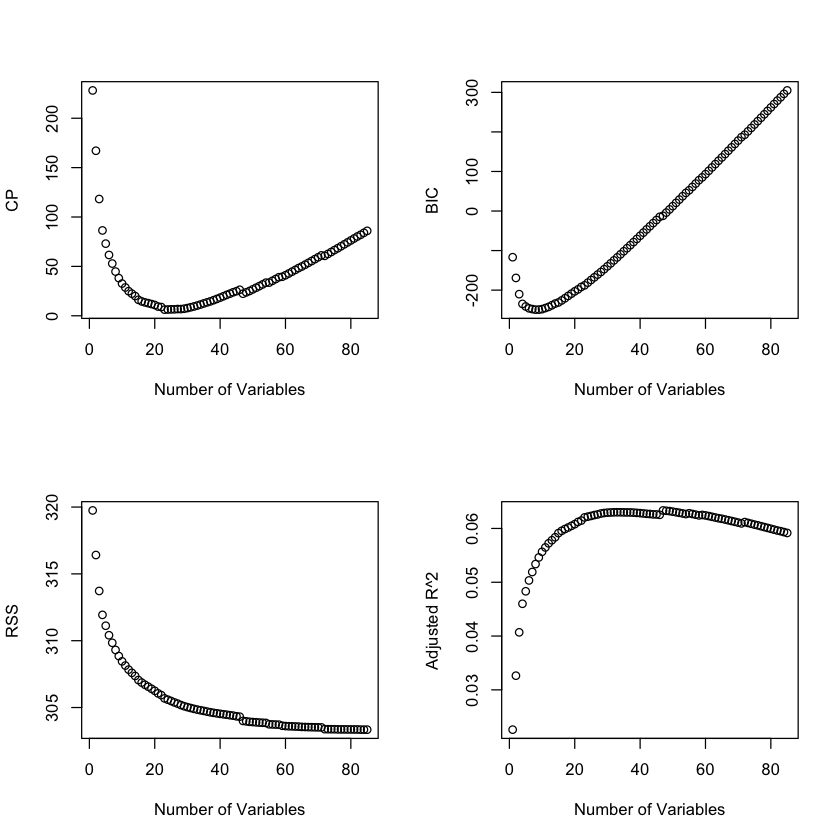

In [51]:
par(mfrow = c(2,2))
plot(forward_summary$cp, xlab = "Number of Variables", ylab = "CP") #Mallows CP
plot(forward_summary$bic, xlab = "Number of Variables", ylab = "BIC") #Bayes Information Criterion
plot(forward_summary$rss, xlab = "Number of Variables", ylab = "RSS") #Residual Sum of Squares
plot(forward_summary$adjr2, xlab = "Number of Variables", ylab = "Adjusted R^2") #Adjusted R Squared

__p value__

In [52]:
forward_summary$outmat

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85
1 ( 1 ),,,,,,,,,,,⋯,,,,,,,,,,
2 ( 1 ),,,,,,,,,,,⋯,,,,,,,*,,,
3 ( 1 ),,,,,,,,,,,⋯,,,,,,,*,,,
4 ( 1 ),,,,,,,,,,,⋯,,,,,,,*,,,
5 ( 1 ),,,,,,,,,,,⋯,,,,,,,*,,,
6 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,,,
7 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,,,
8 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,,,*
9 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,,,*
10 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,*,,*


__optimum model__

In [53]:
print("Calculating the number of variables of best performing subset according to certain model selection measures")
which(forward_summary$cp == min(forward_summary$cp))
which(forward_summary$bic == min(forward_summary$bic)) 
which(forward_summary$rss == min(forward_summary$rss)) 
which(forward_summary$adjr2 == max(forward_summary$adjr2))

[1] "Calculating the number of variables of best performing subset according to certain model selection measures"


[1] 23

[1] 8

[1] 85

[1] 47

In [54]:
forward_summary$outmat[23, ] 

V1  V2  V3  V4  V5  V6  V7  V8  V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 
" " " " " " "*" " " " " "*" " " " " "*" " " " " " " " " " " "*" " " "*" " " " " 
V21 V22 V23 V24 V25 V26 V27 V28 V29 V30 V31 V32 V33 V34 V35 V36 V37 V38 V39 V40 
"*" " " " " " " " " " " " " " " " " " " " " " " " " " " "*" "*" " " " " " " " " 
V41 V42 V43 V44 V45 V46 V47 V48 V49 V50 V51 V52 V53 V54 V55 V56 V57 V58 V59 V60 
"*" "*" "*" "*" " " "*" "*" " " " " " " " " " " " " " " " " " " "*" "*" "*" " " 
V61 V62 V63 V64 V65 V66 V67 V68 V69 V70 V71 V72 V73 V74 V75 V76 V77 V78 V79 V80 
" " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " "*" "*" "*" 
V81 V82 V83 V84 V85 
" " "*" "*" " " "*"

In [62]:
coef(regfit_fwd, 23) 

(Intercept)           V4           V7          V10          V16          V18 
 0.601138905  0.009609302  0.003566035  0.005089834  0.004894039 -0.005563832 
         V21          V35          V36          V41          V42          V43 
-0.008559661 -0.074829917 -0.078182642 -0.014089962  0.006175123  0.003178080 
         V44          V46          V47          V57          V58          V59 
 0.010328150 -0.016014259  0.010302871  0.191534808  0.062101301  0.013249866 
         V78          V79          V80          V82          V83          V85 
-0.405556822 -0.220446132 -0.021892577  0.283548604  0.037377965  0.070120412

## Backward Subset Selection

__model selection__

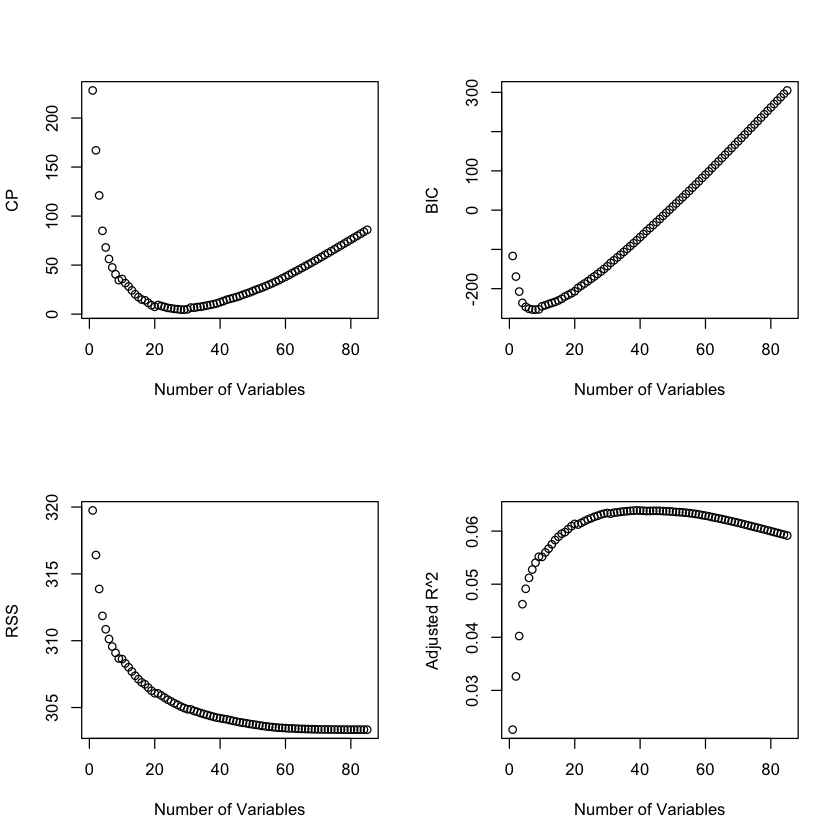

In [56]:
par(mfrow = c(2,2))
plot(backward_summary$cp, xlab = "Number of Variables", ylab = "CP") #Mallows CP
plot(backward_summary$bic, xlab = "Number of Variables", ylab = "BIC") #Bayes Information Criterion
plot(backward_summary$rss, xlab = "Number of Variables", ylab = "RSS") #Residual Sum of Squares
plot(backward_summary$adjr2, xlab = "Number of Variables", ylab = "Adjusted R^2") #Adjusted R Square

In [57]:
backward_summary$outmat

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85
1 ( 1 ),,,,,,,,,,,⋯,,,,,,,,,,
2 ( 1 ),,,,,,,,,,,⋯,,,,,,,*,,,
3 ( 1 ),,,,,,,,,,,⋯,,,,,,,*,,,
4 ( 1 ),,,,,,,,,,,⋯,,,,,,,*,,,
5 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,,,
6 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,,,
7 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,,,*
8 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,,,*
9 ( 1 ),,,,,,,,,,*,⋯,,,,,,,*,*,,*
10 ( 1 ),,,,,,,,,,*,⋯,*,,,,,,*,*,,*


In [63]:
coef(regfit_bwd, 29)
# mallows CP is used for best subset selection

(Intercept)           V4           V6          V10          V17          V18 
 0.625880433  0.010557113 -0.004580412  0.004741649 -0.006885236 -0.013157430 
         V21          V22          V28          V30          V35          V36 
-0.007679696  0.003181598  0.003341660 -0.002542231 -0.068207079 -0.070234021 
         V41          V42          V44          V46          V47          V55 
-0.013613211  0.005720362  0.010337243 -0.016213475  0.010334083 -0.016787090 
         V57          V58          V59          V63          V76          V78 
 0.195199280  0.062671391  0.012829656 -0.049058878  0.039448241 -0.411354129 
         V79          V80          V82          V83          V84          V85 
-0.221856163 -0.021289726  0.284396711  0.036396646  0.110993314  0.073078894

In [64]:
predict.regsubsets = function(object, newdata, id)
{
    form  = as.formula(object$call[[2]])
    mat   = model.matrix(form, newdata)
    coefi = coef(object, id = id)
    xvars = names(coefi)
    mat[, xvars]%*%coefi
}

### __errors:__

#### forward

In [66]:
fwd_train_errors <- matrix(rep(NA, 85))
fwd_test_errors  <- matrix(rep(NA, 85))

for (i in 1:85) {
    
    y_pred_train = predict(regfit_fwd, newdata = train_set, id = i)
    y_pred_test  = predict(regfit_fwd, newdata = test_set, id = i)
    
    y_pred_train = ifelse(y_pred_train > 0.5, 1, 0)
    y_pred_test  = ifelse(y_pred_test > 0.5, 1, 0)
    
    fwd_train_errors[i] = mean(y_pred_train != train_set[, 86])
    fwd_test_errors[i]  = mean(y_pred_test  != test_set[, 86])
}

#### backward

In [67]:
bwd_train_errors <- matrix(rep(NA, 85))
bwd_test_errors  <- matrix(rep(NA, 85))

for (i in 1:85) {
    
    y_pred_train = predict(regfit_bwd, newdata = train_set, id = i)
    y_pred_test  = predict(regfit_bwd, newdata = test_set, id = i)
    
    y_pred_train = ifelse(y_pred_train > 0.5, 1, 0)
    y_pred_test  = ifelse(y_pred_test > 0.5, 1, 0)
    
    bwd_train_errors[i] = mean(y_pred_train != train_set[, 86])
    bwd_test_errors[i]  = mean(y_pred_test  != test_set[, 86])
}

#### plot

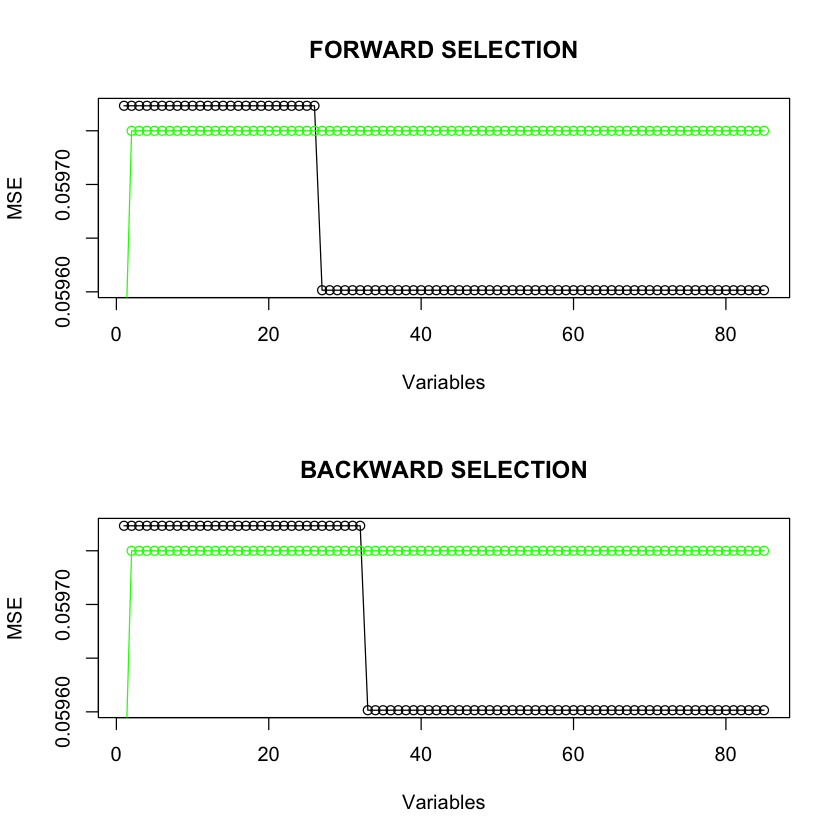

In [68]:
par(mfrow = c(2, 1))

plot(fwd_train_errors, col = "black", type = "o", xlab = "Variables", ylab = "MSE",
    main = "FORWARD SELECTION")
lines(fwd_test_errors, col = "green", type = "o")


plot(bwd_train_errors, col = "black", type = "o", xlab = "Variables", ylab = "MSE",
    main = "BACKWARD SELECTION")
lines(bwd_test_errors, col = "green", type = "o")

### Ridge Regression


In [69]:
ridge_fit_insurance = cv.glmnet(as.matrix(x_train_set), y_train_set, alpha = 0)
ridge_fit_insurance


Call:  cv.glmnet(x = as.matrix(x_train_set), y = y_train_set, alpha = 0) 

Measure: Mean-Squared Error 

    Lambda Index Measure       SE Nonzero
min   0.13    61 0.05370 0.002588      85
1se  35.78     1 0.05619 0.002786      85

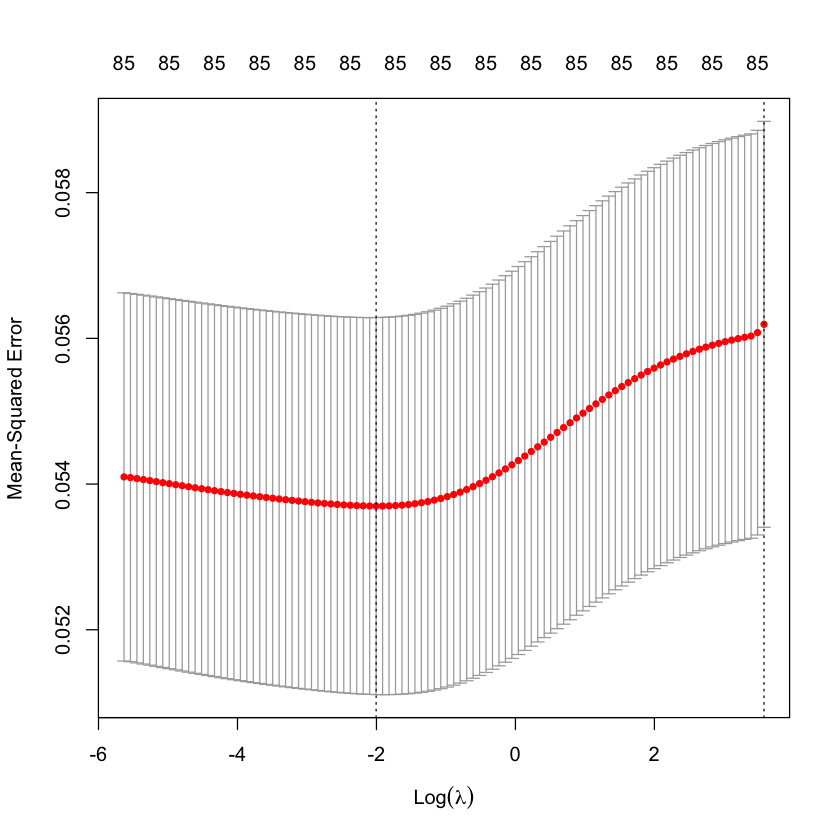

In [70]:
plot(ridge_fit_insurance)

#### finding lambda:

In [71]:
best_lambda_ridge = ridge_fit_insurance$lambda.min
best_lambda_ridge

[1] 0.1346929

In [72]:
best_ridge_coefficient <- predict(ridge_fit_insurance, s= best_lambda_ridge, type = "coefficients")
best_ridge_coefficient

86 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -2.615703e-02
V1          -4.288093e-05
V2          -4.176190e-03
V3          -5.950196e-04
V4           4.554509e-03
V5          -4.780848e-04
V6          -2.295227e-03
V7           1.275155e-03
V8           1.632793e-03
V9          -1.209061e-03
V10          1.401528e-03
V11         -2.514682e-03
V12         -4.471112e-04
V13         -4.890068e-04
V14         -8.228701e-04
V15          5.427156e-04
V16          3.483630e-03
V17          5.582669e-04
V18         -2.124881e-03
V19          6.279750e-04
V20          3.283914e-04
V21         -4.871017e-03
V22          2.036087e-03
V23         -6.526886e-04
V24          8.785905e-05
V25          6.145358e-04
V26         -2.335474e-04
V27         -4.440429e-04
V28          6.983735e-04
V29         -1.200564e-03
V30         -8.857171e-04
V31          7.859750e-04
V32          1.866566e-03
V33          1.674907e-04
V34         -8.851024e-04
V35          3.787143e

In [73]:
#predicting train

train_predict_ridge <- predict(ridge_fit_insurance, s = best_lambda_ridge, newx = as.matrix(x_train_set), type = 'response')
train_predict_ridge <- ifelse(train_predict_ridge > 0.5, 1, 0)


In [74]:
#Predicting test

test_predict_ridge <- predict(ridge_fit_insurance, s = best_lambda_ridge, newx = as.matrix(x_test_set), type = 'response')
test_predict_ridge <- ifelse(test_predict_ridge > 0.5, 1, 0)

In [75]:
table(train_predict_ridge, y_train_set)


                   y_train_set
train_predict_ridge    0    1
                  0 5474  347
                  1    0    1

In [76]:
table(test_predict_ridge, as.integer(unlist(y_test_set)))

                  
test_predict_ridge    0    1
                 0 3762  238

#### MAE

In [77]:
train_error_ridge <- mean(y_train_set != train_predict_ridge )
train_error_ridge

[1] 0.05960151

In [78]:
postResample(y_test_set, test_predict_ridge)

RMSE  Rsquared       MAE 
0.2439262        NA 0.0595000

In [79]:
postResample(y_test_set, test_predict_ridge)

RMSE  Rsquared       MAE 
0.2439262        NA 0.0595000

## Lasso Regression


In [80]:
lasso_fit_insurance = cv.glmnet(as.matrix(x_train_set), y_train_set, alpha = 1)
lasso_fit_insurance


Call:  cv.glmnet(x = as.matrix(x_train_set), y = y_train_set, alpha = 1) 

Measure: Mean-Squared Error 

      Lambda Index Measure       SE Nonzero
min 0.002902    28 0.05347 0.002153      29
1se 0.024659     5 0.05555 0.002285       2

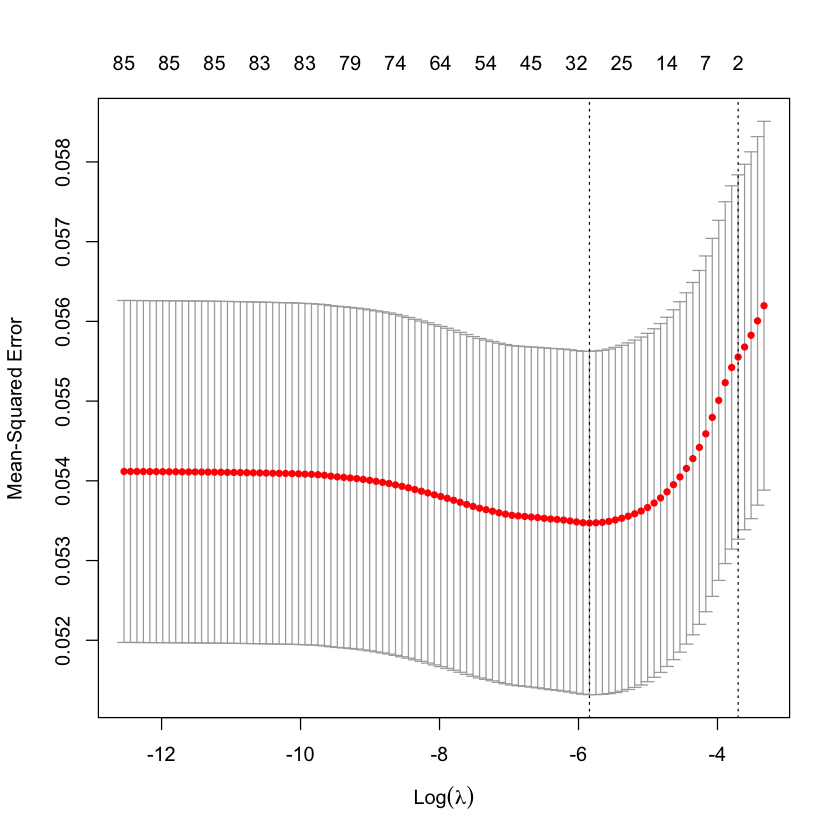

In [81]:
plot(lasso_fit_insurance)

In [82]:
best_lambda_lasso2= lasso_fit_insurance$lambda.min
best_lambda_lasso2

[1] 0.00290187

In [83]:
best_lasso_coeff <- predict(lasso_fit_insurance, s= best_lambda_lasso2, type = "coefficients")
best_lasso_coeff

86 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -0.0350158855
V1           .           
V2           .           
V3           .           
V4           0.0023659351
V5           .           
V6          -0.0008180668
V7           0.0008997072
V8           .           
V9          -0.0007145860
V10          0.0024045545
V11         -0.0012421555
V12          .           
V13          .           
V14          .           
V15          .           
V16          0.0037814375
V17          .           
V18         -0.0027401015
V19          .           
V20          .           
V21         -0.0055942280
V22          0.0013879332
V23          .           
V24          .           
V25          .           
V26          .           
V27          .           
V28          .           
V29          .           
V30         -0.0012670092
V31          .           
V32          0.0019040943
V33          .           
V34          .           
V35          .        

#### predicting train

In [84]:
train_predict_lasso <- predict(lasso_fit_insurance, s=best_lambda_lasso2, newx = as.matrix(x_train_set), 
                               type = "response")
train_predict_lasso <- ifelse(train_predict_lasso > 0.5, 1, 0)

In [86]:
table(train_predict_lasso, y_train_set)
training_accuracy <- 5474 / 5820 
training_accuracy * 100

                   y_train_set
train_predict_lasso    0    1
                  0 5473  347
                  1    1    1

[1] 94.05498

#### predicting test

In [87]:
test_predict_lasso <- predict(lasso_fit_insurance, s=best_lambda_lasso2, newx = as.matrix(x_test_set), 
                               type = "response")
test_predict_lasso <- ifelse(test_predict_lasso > 0.5, 1, 0)


In [88]:
table(test_predict_lasso, y_test_set[, 1])
training_accuracy <- 3761 / 4000 
training_accuracy * 100

                  
test_predict_lasso    0    1
                 0 3760  237
                 1    2    1

[1] 94.025

In [89]:
# Training Error (MAE)

train_error_lasso <- mean(y_train_set != train_predict_lasso)
train_error_lasso

[1] 0.05977327

In [90]:
# Testing Error (MAE)

test_error_lasso <- mean(y_test_set != test_predict_lasso)
test_error_lasso

[1] 0.05975

In [91]:
postResample(y_train_set, train_predict_lasso) # training
postResample(y_test_set, test_predict_lasso) # testing

RMSE    Rsquared         MAE 
0.244485733 0.001185005 0.059773274

RMSE    Rsquared         MAE 
0.244438131 0.001005736 0.059750000

# Q3

In [92]:
#the train data 

x_train <- read.table(gzfile("zip.train.gz"))
y7or9 <- which(x_train[, 1] == 7 | x_train[, 1] == 9)
X.train <- x_train[y7or9,]
head(X.train)
dim(X.train)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,7,-1,-1,-1,-1.000,-1.000,-0.273,0.684,0.960,0.450,⋯,-0.318,1.000,0.536,-0.987,-1,-1,-1,-1,-1,-1
11,7,-1,-1,-1,-1.000,-1.000,-0.596,0.912,1.000,0.290,⋯,-1.000,-0.795,0.663,-0.074,-1,-1,-1,-1,-1,-1
15,7,-1,-1,-1,-1.000,-1.000,-1.000,-1.000,-1.000,-0.632,⋯,-1.000,-0.967,0.866,-0.001,-1,-1,-1,-1,-1,-1
16,7,-1,-1,-1,-0.929,0.351,0.798,0.806,0.114,0.015,⋯,0.835,-0.086,-0.991,-1.000,-1,-1,-1,-1,-1,-1
23,7,-1,-1,-1,-1.000,-0.869,0.777,-0.007,-0.697,-1.000,⋯,-0.933,0.667,-0.315,-1.000,-1,-1,-1,-1,-1,-1
26,7,-1,-1,-1,-1.000,-0.846,-0.011,-0.920,-1.000,-1.000,⋯,-1.000,0.008,0.405,-1.000,-1,-1,-1,-1,-1,-1


[1] 1289  257

In [93]:
#the test data

x_test <- read.table(gzfile("zip.test.gz"))
y7or9 <- which(x_test[, 1] == 7 | x_test[, 1] == 9)
X.test <- x_test[y7or9,]
dim(X.test)
head(X.test)

[1] 324 257

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9,-1,-1.00,-1.000,-1.000,-1.000,-0.948,-0.561,0.148,0.384,⋯,-1.000,-0.908,0.430,0.622,-0.973,-1.000,-1,-1,-1,-1
10,9,-1,-1.00,-1.000,-1.000,-1.000,-0.904,-0.060,0.638,0.678,⋯,-0.567,0.642,-0.925,-1.000,-1.000,-1.000,-1,-1,-1,-1
19,9,-1,-1.00,-1.000,-0.916,-0.600,-0.034,0.711,1.000,0.488,⋯,1.000,0.375,-0.982,-1.000,-1.000,-1.000,-1,-1,-1,-1
24,9,-1,-1.00,-1.000,-1.000,-1.000,-1.000,-1.000,-0.441,0.530,⋯,-1.000,-1.000,-1.000,-0.057,0.558,-0.999,-1,-1,-1,-1
31,7,-1,-0.99,0.700,0.283,-0.131,-0.598,-1.000,-1.000,-1.000,⋯,-0.700,0.734,-0.261,-1.000,-1.000,-1.000,-1,-1,-1,-1
35,7,-1,-1.00,-0.862,0.000,0.296,-0.231,0.142,0.384,0.763,⋯,0.703,-0.448,-1.000,-1.000,-1.000,-1.000,-1,-1,-1,-1


#### classification

In [94]:
L <- lm(V1 ~., data = X.train)
L_predict <- predict(L, X.test)
L.error <-  mean((L_predict - X.test$V1)^2)
L.error

Warning message in predict.lm(L, X.test):
“prediction from a rank-deficient fit may be misleading”


[1] 1.780327e+26

In [95]:
library(class)
k <- c(1, 3, 5, 7, 9, 11, 13, 15)
k.error <- rep(NA, length(k))
for (i in 1:length(k)) {
    knn_predict <- knn(X.train, X.test, X.train$V1, k[i])
    k.error[i] <- mean((knn_predict != X.test$V1))
}
k.error[1]
k.error[2]
k.error[3]
k.error[4]
k.error[5]
k.error[6]
k.error[7]
k.error[8]

[1] 0.01851852

[1] 0.01851852

[1] 0.0154321

[1] 0.01851852

[1] 0.02160494

[1] 0.02777778

[1] 0.0308642

[1] 0.02777778

In [96]:
error_rate <- matrix(c(L.error, k.error), ncol = 1)
colnames(error_rate) <- c("Error Rate")
rownames(error_rate) <- c("Linear Regression", paste("k-NN with k =", k))
error_rate

,Error Rate
Linear Regression,1.780327e+26
k-NN with k = 1,1.851852e-02
k-NN with k = 3,1.851852e-02
k-NN with k = 5,1.543210e-02
k-NN with k = 7,1.851852e-02
k-NN with k = 9,2.160494e-02
k-NN with k = 11,2.777778e-02
k-NN with k = 13,3.086420e-02
k-NN with k = 15,2.777778e-02


The error rate is fluctuating greatly. kNN performs much better than linear regression for classification. As nearest neighbours increases, error rate increases.